In [2]:
import re
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import integrate
from scipy.signal import find_peaks

In [3]:
#读取单个的PE loop的文件
df = pd.read_csv(r'C:\PhD-Zipeng\Research projects\PUND\BF4 PUND PE Heating\365.18.tab',delimiter='\t',encoding= 'unicode_escape')
df.head(10)

,#Drive Voltage,E_SI,Measured Polarization,P_SI,Point,Time (ms)
0,-8.3160,-8.3160,-2.360650,-0.023606,1.0,0.05
1,-2.8229,-2.8229,-2.357132,-0.023571,2.0,0.10
2,-3.5858,-3.5858,-2.350934,-0.023509,3.0,0.15
3,-4.8065,-4.8065,-2.344568,-0.023446,4.0,0.20
4,1.5259,1.5259,-2.336025,-0.023360,5.0,0.25
5,2.5940,2.5940,-2.330664,-0.023307,6.0,0.30
6,0.0763,0.0763,-2.326309,-0.023263,7.0,0.35
7,-3.3569,-3.3569,-2.318436,-0.023184,8.0,0.40
8,6.7139,6.7139,-2.312070,-0.023121,9.0,0.45
9,4.9591,4.9591,-2.306877,-0.023069,10.0,0.50


<class 'pandas.core.series.Series'>


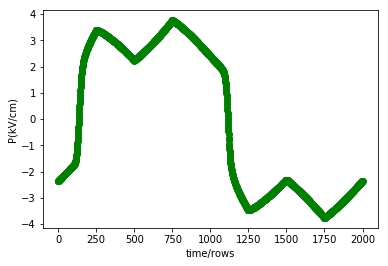

[ 250  750 1500]


,#Drive Voltage,E_SI,Measured Polarization,P_SI,Point,Time (ms)
250,296.3257,296.3257,3.386357,0.033864,251.0,12.55
251,297.2412,297.2412,3.385687,0.033857,252.0,12.60
252,292.3584,292.3584,3.385519,0.033855,253.0,12.65
253,290.9851,290.9851,3.382839,0.033828,254.0,12.70
254,294.1132,294.1132,3.382169,0.033822,255.0,12.75
255,290.3748,290.3748,3.379823,0.033798,256.0,12.80
256,287.2467,287.2467,3.377311,0.033773,257.0,12.85
257,288.8489,288.8489,3.378651,0.033787,258.0,12.90
258,286.4838,286.4838,3.374463,0.033745,259.0,12.95
259,282.5928,282.5928,3.373123,0.033731,260.0,13.00


In [4]:
# 提取出P值的plot,并且找到前两个peak，然后做差，即得出 delta P，which is from leakgae only
P_value = df['Measured Polarization']
print(type(P_value))
plt.plot(P_value,'go--')
plt.xlabel('time/rows')
plt.ylabel('P(kV/cm)')
plt.show()
indices = find_peaks(P_value, prominence=1)[0]
print(indices)

df[250:260]

# 因为找到的峰不止一个，为了保险起见，我选择将图像分段，0-500和500-1000个点为区间，分别找peak

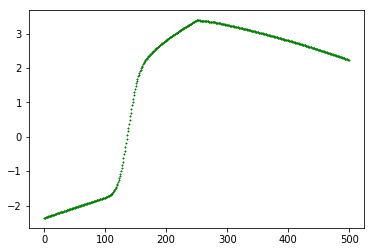

[250]


In [5]:
P_peak1 = P_value[0:500]
plt.plot(P_peak1, color='green', marker='+', linestyle='dashed',linewidth=0.1, markersize=2)
plt.show()
index1 = find_peaks(P_peak1, prominence = 1)[0]
print(index1)
# print(type(P_peak1))

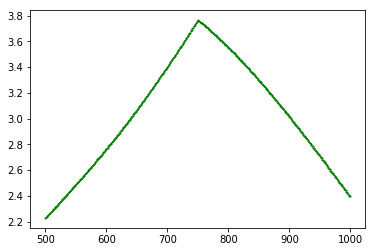

[750]


In [8]:
P_peak2 = P_value[500:1000]
plt.plot(P_peak2,color='green', marker='+', linestyle='dashed',linewidth=0.1, markersize=2)
plt.show()
index2 = find_peaks(P_peak2, prominence = 1)[0]+500  #要加上500，因为上一段有500个点
print(index2)

# 1st peak substract 2nd peak
## 非常粗暴的PUND 处理方式，得到很平的PE loop
## 原因在于 P有三个 来源：polarization  + constant capacitance + conduction，正常铁电包含前两个。当做粗暴的PUND，我们只考虑了domain翻转，没有考虑他的电容带来的P

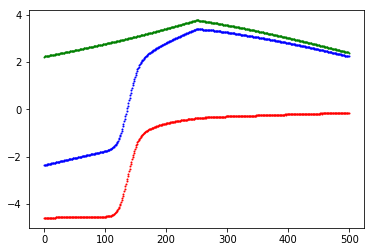

In [6]:
Peak1 = list()
Peak2 = list()
Peak3 = list()
Peak4 = list()
Voltage = list()

j = 0
for i in range(500):
    Peak1.append(df.loc[j,'Measured Polarization'])
    j = j +1

# print(Peak1)
# print(type(Peak1))
n = 500
for i in range(500):
    Peak2.append(df.loc[n,'Measured Polarization'])
    n = n +1
    
m = 1000
for i in range(500):
    Peak3.append(df.loc[m,'Measured Polarization'])
    m = m +1
    
k = 1500
for i in range(500):
    Peak4.append(df.loc[k,'Measured Polarization'])
    k = k +1
    
l = 0
for i in range(500):
    Voltage.append(df.loc[l,'#Drive Voltage'])
    l = l +1
    
# print(Peak2)

dic={"Drive Vol":Voltage, "1st peak":Peak1,
  "2nd peak":Peak2, "3rd peak":Peak3, "4th peak":Peak4}
Four_peaks=pd.DataFrame(dic)
Four_peaks.head(10)

diff_up = Four_peaks['1st peak'] -  Four_peaks['2nd peak']

plt.plot(diff_up, color='red', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(Four_peaks['1st peak'], color='blue', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(Four_peaks['2nd peak'], color='green', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.show()

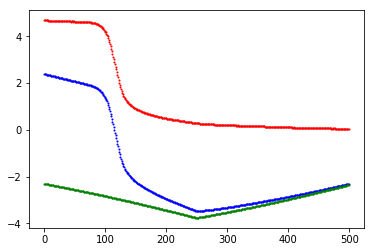

In [7]:
diff_down = Four_peaks['3rd peak'] -  Four_peaks['4th peak']

plt.plot(diff_down, color='red', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(Four_peaks['3rd peak'], color='blue', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(Four_peaks['4th peak'], color='green', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.show()

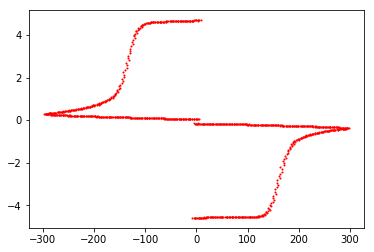

In [11]:
plt.plot(Four_peaks['Drive Vol'],diff_up, color='red', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(-Four_peaks['Drive Vol'],diff_down, color='red', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)

plt.show()

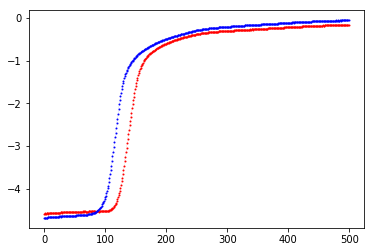

In [16]:
# 下面是 polarization fron only switching
plt.plot(diff_up, color='red', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(-diff_down, color='blue', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.show()

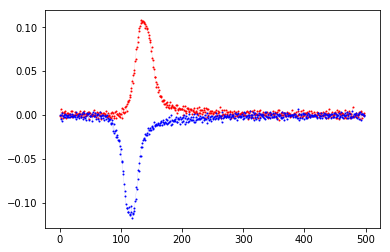

In [27]:
# 下面是 current fron only switching
# 通过直接微分polarization 求得（用的function是np.diff()），此处单位没有换算，只看图像形状
switching_current_up = np.diff(diff_up)
switching_current_down = np.diff(diff_down)

plt.plot(switching_current_up, color='red', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(switching_current_down, color='blue', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.show()